In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

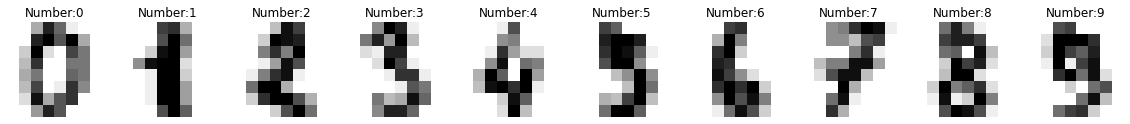

In [6]:
from sklearn.datasets import load_digits

digits = load_digits()

plt.figure(figsize = (20,5))
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(1,10,label+1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Number:{0}'.format(label))

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=12)

models = {
    'LR' : LogisticRegression(solver='liblinear'),
    'SVM' : SVC(kernel='linear'),
    'RandomForest' : RandomForestClassifier(),
    'K-NN' : KNeighborsClassifier(n_neighbors=10),
    'DecisionTree' : DecisionTreeClassifier()
}

print('Train : ', pd.DataFrame(Y_train,columns=['label']).groupby('label')['label'].count())
print('Test : ', pd.DataFrame(Y_test,columns=['label']).groupby('label')['label'].count())

Train :  label
0    133
1    136
2    133
3    137
4    136
5    136
6    136
7    134
8    131
9    135
Name: label, dtype: int64
Test :  label
0    45
1    46
2    44
3    46
4    45
5    46
6    45
7    45
8    43
9    45
Name: label, dtype: int64


In [21]:
from sklearn.metrics import confusion_matrix

scores = {}
for model_name, model in models.items():
    model.fit(X_train,Y_train)
    Y_pred = model.fit(X_train,Y_train).predict(X_test)
    confusion_M = confusion_matrix(Y_test, Y_pred)
    print('confusion_M : ')
    print(confusion_M)
    print('Train : ',model.fit(X_train,Y_train).__class__.__name__, model.score(X_train, Y_train))
    print('Test : ',model.fit(X_train, Y_train).__class__.__name__, model.score(X_test, Y_test))
    print('===============================================================\n')
    scores[(model_name, 'Train Score')] = model.score(X_train, Y_train)
    scores[(model_name, 'Test Score')] = model.score(X_test, Y_test)

pd.Series(scores).unstack()

confusion_M : 
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  1  0  0  0  0  1  2]
 [ 0  1 42  0  0  0  0  0  1  0]
 [ 0  0  0 44  0  1  0  0  0  1]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  1  1]
 [ 0  1  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  2  0  2  0  0  0  0 38  1]
 [ 0  0  0  0  0  0  0  0  0 45]]
Train :  LogisticRegression 0.994060876020787
Test :  LogisticRegression 0.9644444444444444

confusion_M : 
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  1]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  1  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  1  0  0  0 44]]
Train :  SVC 1.0
Test :  SVC 0.9844444444444445

confusion_M : 
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 44  0

,Test Score,Train Score
DecisionTree,0.846667,1.000000
K-NN,0.982222,0.983667
LR,0.964444,0.994061
RandomForest,0.982222,1.000000
SVM,0.984444,1.000000
